In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def set_ch(): 
    "在plot图中显示中文"
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    return
set_ch() # 显示中文在plot中

In [3]:
#数据源是一份包含全球所有国家有数据统计以来的GDP变化率
dataReal = r"./world_history_gdp_data.csv"
pdata = pd.read_csv(dataReal,sep=",") 
pdata.head()
indexs = pdata.keys().values # 属性的名称列表, column

In [4]:
#选取1982、1983...2001这20年的GDP为研究对象
startYear='1982'
#设定开始统计GDP的年份，最早从1982年开始
for i,year in enumerate(indexs):
    if year==startYear:
        from_= i
        break

In [5]:
x_pos = indexs[from_:]
for i in range(len(x_pos)):
    x_pos[i] = int(x_pos[i])

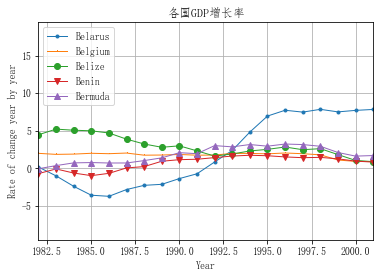

In [6]:
#创建坐标轴 
fig, ax = plt.subplots()
#1.显示整个窗口的标题 
#fig.canvas.set_window_title('GDP countries')
#2.显示当前图表的x，y轴标注 
ax.set_xlabel("Year")
ax.set_ylabel("Rate of change year by year")
#3.显示坐标轴的网格 
ax.grid()
#从数据源中的那个国家的开始点和结束点开始统计
startCountry,endCountry= 20,25
#4.标注所有线的标记类型，方便不便区分颜色的人阅读 
markerSymbols = ['.', ',', 'o', 'v', '^', '<', '>', 's', 'p', 'P']
#5.设置x轴的大小范围 
ax.set_xlim(min(x_pos), max(x_pos))

minY,maxY=0,0
linesets=[]
countries=[]

for i,gdps in enumerate(pdata.iloc[startCountry:endCountry].values):
    line, = ax.plot([], [], lw=1) 
    linesets.append(line)
    countries.append(gdps[0]) # gdps[0]是国家的名字 
    #set_marker 
    line.set_marker(markerSymbols[i])
    #set_data  
    line.set_data(x_pos[0:], gdps[from_:])
    #计算GDP变化率中的最小值
    minY = min(min(gdps[from_:]), minY)
    #计算GDP变化率中的最大值
    maxY = max(max(gdps[from_:]), maxY)


plt.legend(linesets, countries, loc='upper left')
plt.title(u'各国GDP增长率')
#8.更改GDP变化率中的最小最大值范围
delta = maxY - minY
minY = minY - delta / 2
maxY = maxY + delta
ax.set_ylim(minY, maxY)
plt.show()